# Bayes Rule & Probality Review
Bayes rule is defined as: 
### $$p(A|B)=\frac{p(A,B)}{p(B)}$$
Where:
* p(A|B) is the **conditional probability** of A given B
* P(A,B) is the **joint probability** of A and B
* p(B) is the **marginal probability** 

# Example 1 

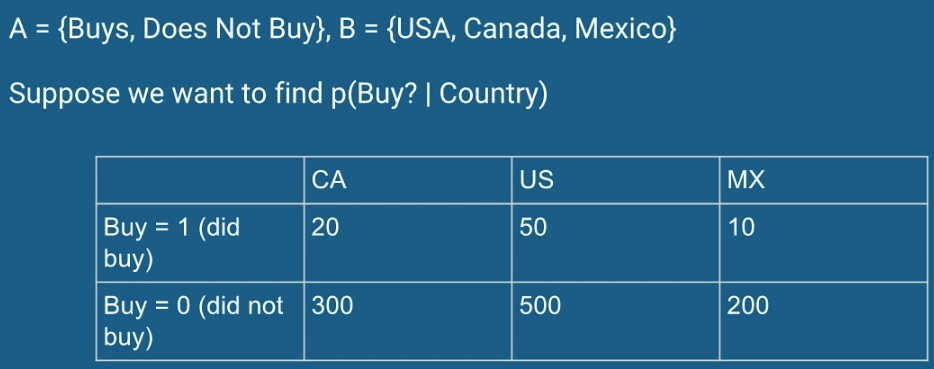

So again, we want to find probability that someone is going to buy from your site, given their country. 

That means we want to use Baye's rule! Which is this case looks like:

### $$p(Buys?|Country)=\frac{p(Buys?,Country)}{p(Country?)}$$
## Marginal Probabilities
We can focus on marginal probability first. Here we are just trying to find the probability that a user is going to be from a specific country.

That will allow us to use the formula:
### $$p(Country=US) = \frac{users\;from\;US}{total\;number\;of\;visitors}$$

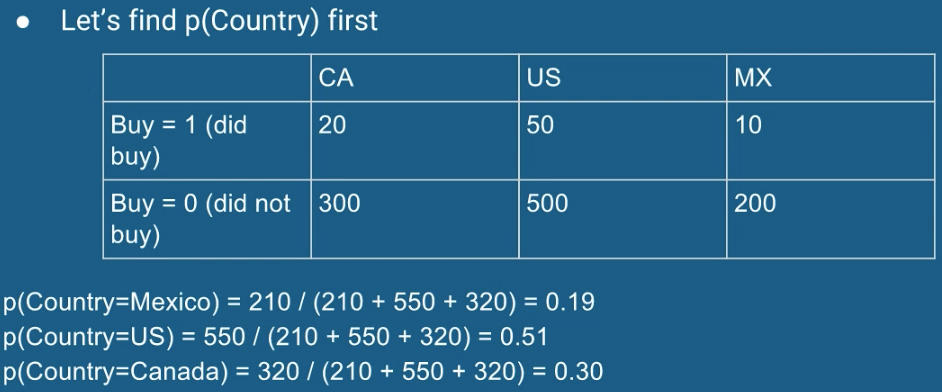

## Joint Probabilities
Now we are trying to find the probability that some one will Buy? **and** they are from a certain country. 

We should ask, how many probabilities are we looking for here? A joint probability must encode all possibilities. In this case there are:
* two outcomes for if a user buys (yes or no)
* three outcomes for country (Mexico, US, Canada)
* So the total number of possibilities is 6

This can be shown to increase the space of probabilties exponentially as more variables are added. This is known as the curse of dimensionality-this is a bad thing, because as things get large we have more computation to perform. 

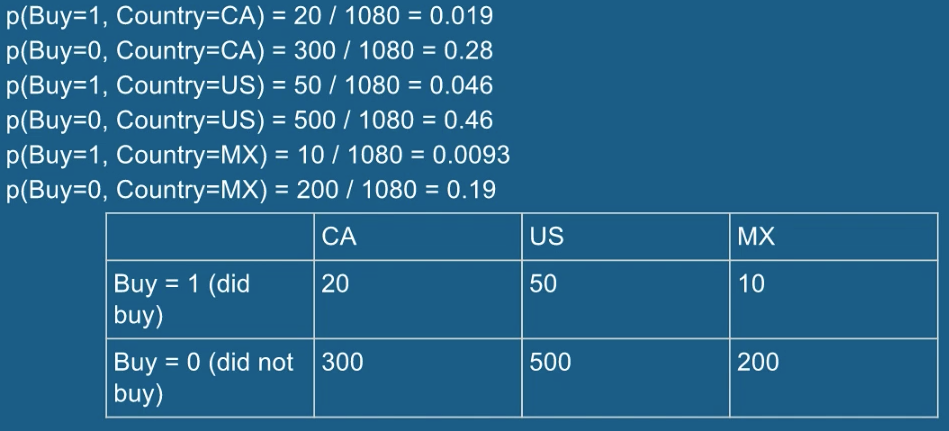

In the figure above we can see all 6 joint probabilities. Joint probability is defined as:
### $$p(A,B) = p(A|B)*p(B)$$
which in the first example (buy = 1 and country = canada) looks like:
### $$p(buy=1,country=canada) = p(buy=1|country=canada)*p(country=canada)$$
### $$p(buy=1,country=canada) = \frac{20}{320}*\frac{320}{1080}=0.019$$
The other examples follow this same form. 

Notice that these numbers are much smaller than the marginal probabilities. Remember though that the sum of all possible outcomes must equal 1, and if the total possibilities grows exponentially, actual probabilities values will shrink exponentially. 

This is important because computers have finite precision - 32-bit float holds 32-bits of information, so we can't store an infinite number of values. This is another consequence of the curse of dimensionality. 

### Underflow
* As probability approaches 0, eventually the computer will round down to 0
* this is known as the underflow problem 
* common in probability to use the log probability instead
* Log grows slowly as its argument increases

## Conditional Probabilities 
Now we are trying to find the probability that a user buys or doesn't buy, given they are from a certain country. This takes the shape of Bayes Rule, defined again here:
### $$p(A|B)=\frac{p(A,B)}{p(B)}$$

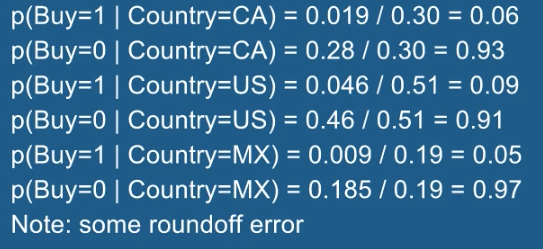

Lets walk through the first calculation from the figure above. We start with the formula:
### $$p(buy=1|country=canada)=\frac{p(buy=1,country=canada)}{p(country=canada)}$$
which can be simplified to:
### $$p(buy=1|country=canada)=\frac{0.019}{\frac{320}{1080}} = 0.06$$

Notice, that the conditional probabilities in the figure above no longer sum to 1, they sum to 3! Why? Well, we are **given** a country - the space of random variables is only buy and not buy. Country is no longer random here!

## Marginalization
In short, marginalization is how to safely ignore variables. Remember:
* **Marginal probability**: is the probability of any single event occurring unconditioned on any other events. Whenever someone asks you whether the weather is going to be rainy or sunny today, you are computing a marginal probability. 
* ** Joint probability**: probability of more than one event occurring simultaneously. If I ask you whether the weather is going to be rainy and the temperature is going to be above a certain number, you are computing a joint probability.
* **Conditional probability**:  probability of an event occurring given some events that you have already observed. When I ask you what’s the probability that today is rainy or sunny given that I noticed the temperature is going to be above 80 degrees, you are computing a conditional probability.

These three concepts are intricately related to each other. Any marginal probability can always be computed in terms of sums of joint probabilities by a process called **marginalization**.

Mathematically, this looks like this for two events A and B:
### $$p(A)=\sum_bp(A,b)$$
Here, because we know the probability distribtion p(A,B), we are able to find all instances where A occurs by summing over all of B. This gives us p(A)! 

And joint probabilities can always be expressed as the product of marginal probabilities and conditional probabilities by the chain rule.

### $$p(A,B) = p(A)*p(B|A)$$

To solidify these concepts look at the following image: 

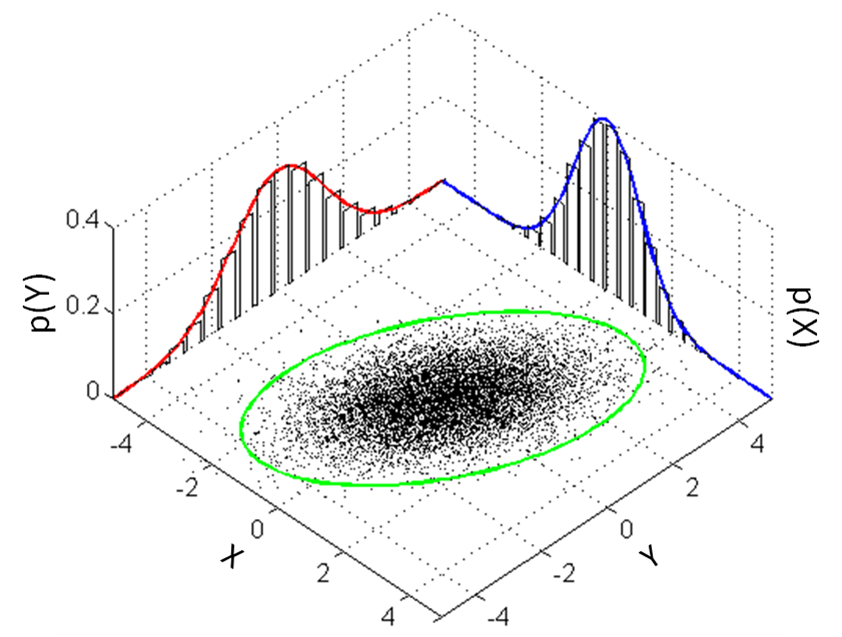

The marginal distributions are shown in blue and red, while the joint distribution is shown inside the green circle. 

And here is how the marginalization process may look: 

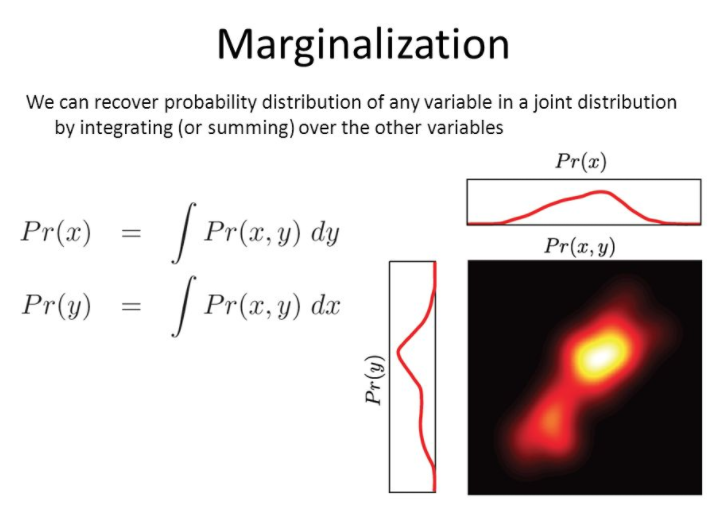

---

# Example 2
Lets look at a slightly different problem. It is the same variables, but different counts. 

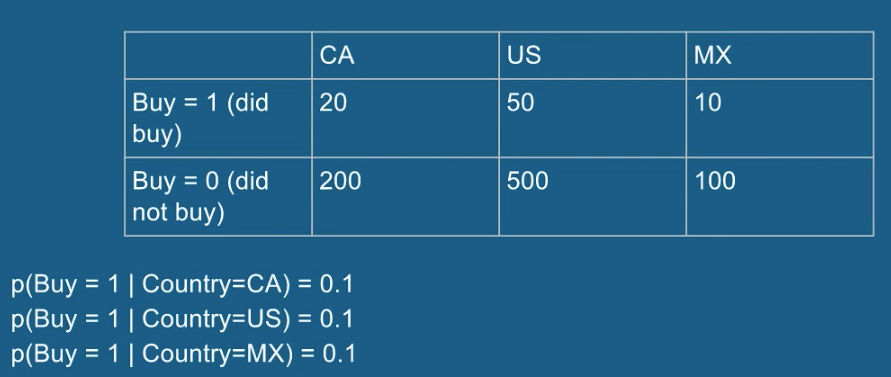

In this case, the probability of buying seems to be **independent** of where you are from! 

## Independence 
When two variables are independent, the joint probability becomes the multiple of the marginal probabilities. 

For example, if A & B are independent: 
### $$p(A,B) = p(A)p(B)$$
So if Buy and country are independent: 
### $$p(Buy | Country) = \frac{p(Buy,Country)}{p(Country)} = \frac{p(Buy)p(Country)}{p(Country)}= p(Buy)$$

## Manipulating Bayes Rule
Lets make Bayes Rule look more like the form that we will use in this course. We know:
### $$p(A|B)=\frac{p(A,B)}{p(B)}$$
The opposite is also true:
### $$p(B|A)=\frac{p(B,A)}{p(A)}$$
And since:
### $$p(A,B)=p(B,A)$$:
We can write:
### $$p(A|B)=\frac{p(B|A)*p(A)}{p(B)}$$
Now, often times we may not have $p(B)$ directly, but this is just the marginal distribution of the joint probability p(a,b), summed over all p(a). It looks like:
### $$p(B)=\sum_ip(A_i,B) = \sum_ip(B|A_i)*p(A_i)$$
If we are working with continuous distributions, sum turns into an integral. 

Another way to think of this, is that the term on the bottom is just a normalization constant (Z) to ensure that the distribution sums to one. 
### $$p(A|B)=\frac{p(B|A)*p(A)}{Z}$$

Another way of saying this, is that:
### $$p(A|B)\propto p(B|A)*p(A)$$
Sometimes, this is used when we are trying to find the argmax of a distribution:
### $$argmax_Ap(A|B)$$
So in this case, we don't need to know the actual value of the probability, just the particular A that gives us the maximum probability. Because Z is independent of A:
### $$argmax_Ap(A|B) = argmax_Ap(B|A)p(A)$$ 

## Bayes for Classification
In the context of the Bayes Classifier, y represents the class, and x represents the data.
### $$p(y|x)=\frac{p(x|y)*p(y)}{p(x)}$$
We refer to p(x|y) the **generative distribution**, because it tells us what the features look like for a specific class y, which we are already given. 

Note, that while the bayes classifier does make use of bayes rule, it does NOT necessarily make use of bayesian statistics. 

--- 

# Probability Exercise

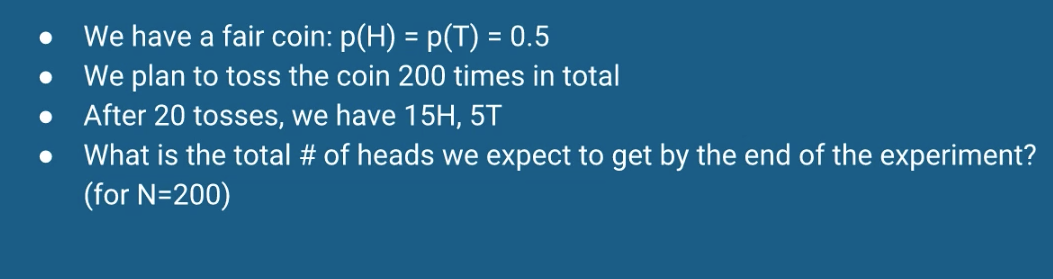

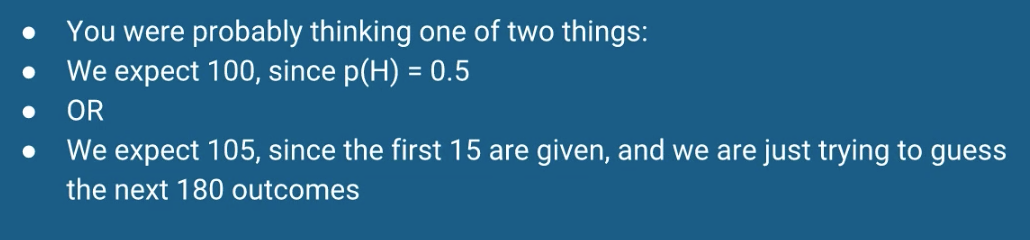

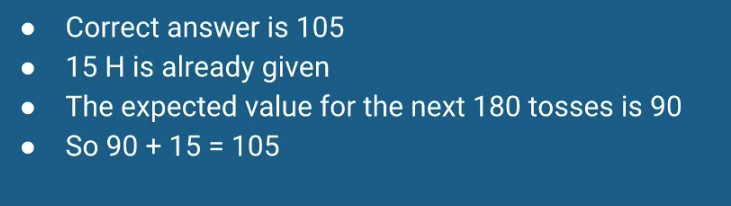

Because first 15 tosses are given, they are no longer random. So we only need to calculate the next 180 tosses, of which 90 are heads. 

If you guessed the incorrect answer, know that this mistake is so common that is has a name: 

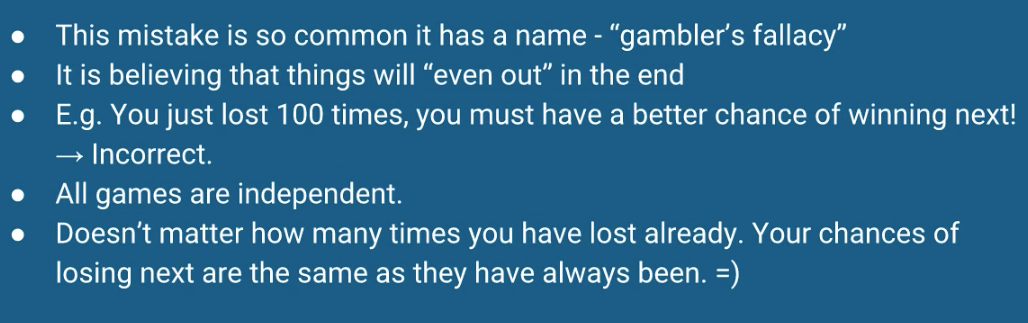

# The Monty Hall Problem
This is a famous problem in probability. Imagine you are on a game show and you have to pick a door. There are 3 doors, and behind 1 of the doors there is a car, and behind the other two doors there are goats. Here is how the game works:
1. You pick a door (you do not get to see what is behind it) (door 1)
2. Monty Hall opens a door you didn't pick, always reveals a goat (door 2)
3. You are given a choice: stay with door 1, or switch to door 3

### Which should you choose? 
So, remember, you choose door 1, and each probability is conditioned on this. We then define the following:
* C = where the car really is
* **p(C=1) = p(C=2) = p(C=3) = 1/3** 
    * ex. p(C=1) represents the probability that a car is behind door 1
* H = random variable to represent the door that Monty Hall opens 
* We assume he opens door 2 without loss of generality, problem is symmetric 
* **p(H=2 | C=1) = 0.5 **
    * remember that you chose door 1. So if the car is behind door 1, he can choose either door 2 or 3 since they will each be a goat
* **p(H=2 | C=2) = 0**
    * If the car is behind door 2, he cannot open door 2, so the probability is 0
* **p(H=2 | C=3) = 1** 
    * similarly, if the car is behind door 3, then monty hall has to open door 2, since that is the only door left with a goat. 
* What probability do we actually want? We want to know if we should stick with door 1 or switch to door 3
* In other words compare:
    * **p(C=1 | H=2), p(C=3 | H=2)** 
* to do that, lets use bayes rule!
### $$p(A|B)=\frac{p(B|A)*p(A)}{p(B)}$$
### $$p(A|B)=\frac{p(B|A)*p(A)}{\sum_ip(B|A_i)*p(A_i)}$$
where in our case:
### $$A: C=3 \;, B: H=2$$
### $$p(C=3|H=2) = \frac{p(H=2|C=3)p(C=3)}{p(H=2)}$$
### $$p(C=3|H=2) = \frac{p(H=2|C=3)p(C=3)}{p(H=2|C=1)p(C=1)+p(H=2|C=2)p(C=2)+p(H=2|C=3)p(C=3)}$$
### $$p(C=3|H=2) = \frac{\frac{1}{3}}{\frac{1}{2}*\frac{1}{3}+0*\frac{1}{3}+1*\frac{1}{3}} = \frac{2}{3}$$
And we can similarly show: 
### $$p(C=1|H=2) = \frac{1}{3}$$

### This means we should ALWAYS switch doors!

## Intuition
We can also think about the problem like so: 
* p(C=1) = 1/3
* p(C=2) = 1/3
* p(C=3) = 1/3
* p(C=2 or C=3) = 2/3
* now lets say that we pick door 1, and monty hall opens door 2, showing us there is a goat behind it
* we now know that p(C=2) = 0 
* however, our equation p(C=2 or C=3) = 2/3 still remains true
* which means that p(C=3) = 2/3
* and p(C=1) = 1/3
* so we want to pick door 3 
* Note the reason this happens is because once door 2 is opened, it is known and is no longer a random variable 

# Imbalanced Classes 
Lets look at another example of where Bayes rule comes into play. Suppose we are doing disease testing. We would take a blood sample, extract some features from it, and output whether or not that person has the disease. 
* Input = blood sample
* Output = yes/no
* What is a good accuracy? 80%? 90%? 95%?

Lets look further at a realistic scenario where this is involved. 
* Most people are healthy and non diseased, most of the time
* So suppose that only 1% of the population has the disease
* we can build a classifier that just predicts "no" each time
* i.e. it doesn't learn anything
* It is already correct for 99% of cases though! (this is similar to example andrew NG went over) 
* So that is not useful
* perhaps we do not care about overall accuracy? 

## So what should we measure? 
* we want to measure p(predict=1 | disease=1) 
* This is called the true positive rate 
* Medical terminology: this is referred to as **sensitivity** 
* Information retrieval: **hit rate** or **recall**
* using bayes rule:
### $$p(prediction=1 | disease=1) = \frac{p(prediction=1, disease=1)}{p(disease=1)}$$
Typically, we count 4 things: 
* **true positives** (you have the disease, and we predict you have the disease)
* **true negatives** (you don't have the disease, and we predict you dont' have the disease)
* **false positives** (you don't have the disease, and we predict you have the disease)
* **false negatives** (you have the disease, and we predict you don't have the disease)

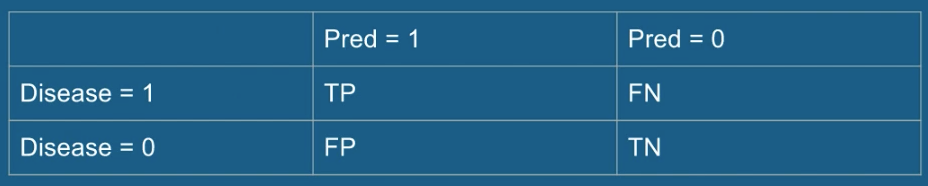

## Calculating Sensitivity 
### $$p(prediction=1 | disease=1) = \frac{p(prediction=1, disease=1)}{p(disease=1)}$$
### $$sensitivity = recall = \frac{TP}{TP+FN}$$

## Specificity 
* This is the true negative rate 
### $$p(prediction=0 | disease=0) = \frac{p(prediction=0, disease=0)}{p(disease=0)}$$
### $$specificity = \frac{TN}{TN+FP}$$

## Question:
* in information retrieval, rather than specificity, we are interested in "precision" 
### $$precision = \frac{TP}{TP+FP}$$
* what is this the probability of? 
Well, TP can be defined as:
### $$TP = p(prediction=1, disease=1)$$
and TP+FP:
### $$TP+FP = p(prediction=1)$$
which then looks like:
### $$precision = \frac{TP}{TP+FP} = \frac{p(prediction=1, disease=1)}{p(prediction=1)}$$
which equals:
### $$p(disease=1|prediction=1) = \frac{p(prediction=1, disease=1)}{p(prediction=1)}$$
This is a useful measure! Just because your results come back positive, does not mean that you have the disease! Generally, more testing is required! 

--- 

# How do you find the mean of a gaussian?
* "Maximumum Likelihood" - what does that mean?

## A Gaussian Sample
* supposed we have collected one sample from a gaussian distributed data source, which we will call x 
* What is the probability density of that one point? 
* Well, we plug it into the guassian formula! Shown here: 

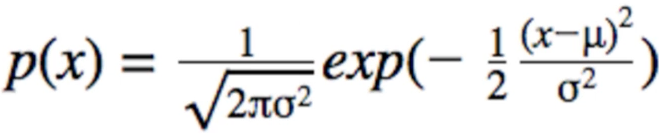

* Now of course in a real experiment we will collect multiple samples
* Typically these samples are **IID** - independent and identically distributed
* Identically distributed - they are all Gaussian with the same mean/variance 
* Independent:
    * If I flip a fair coin and I've gotten 10 heads so far, whats the next toss likely to be? 
    * You may think "I have flipped 10 heads, I must get a tails soon!" -incorrect
    * P(T|HHHHHHHHHH) = P(T) = 0.5
* This independence also means that if I want to know the joint probability of all the samples I just drew, I can just multiply the probabilities of each individual sample 

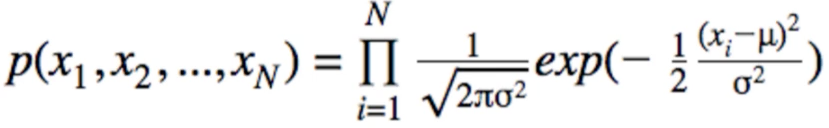

Now the equation above it *almost* right, but the idea is that we want to find the mean of a gaussian. So instead we can write the probability of the data as:

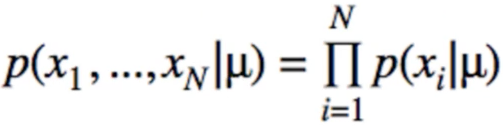

When we are talking about Bayesian Models, this probability has a name- it is called the **likelihood distribution**.

## Data Likelihood
* in general terms, the **likelihood distribution** is the probability of the data given the parameters
* in our case, the probability of our observations, given the mean of the gaussian distribution
* e.g. p(data | parameters) 
* Parameters depend on what the model is, e.g. Gaussian, Beta, Gamma, etc.
* Gaussian has mean/variance, we will focus on mean

## Maximum Likelihood
* Now we have likelihood, how do we maximize it? 
* In other words, what is the best setting of $\mu$, such that the likelihood is maximized?
* When we want to maximize a function with respect to a variable, calculus provides the tools we need:
    * set $\frac{dP}{d\mu} =0$ and solve for $\mu$
* Taking the log is useful (log-likelihood)
* Why? Well the Gaussian has an exponential, derivative of exponential is the same thing, so it won't be easy to solve

### Getting rid of the exponential
* log(exp(A)) = A
* This is okay because log() is a monotonically (entirely increasing) increasing function 
* If $\mu^*$ yields a maximum P, then it also yields a maximum log(P)

### Log-likelihood

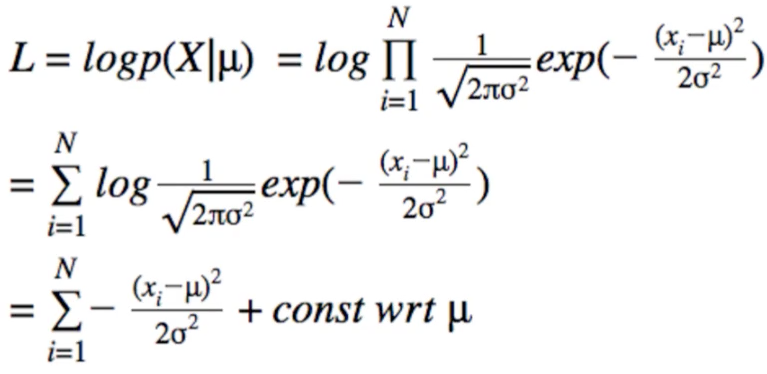

We end up with a quadratic function, that is very easy to take the derivative of! After taking the derivative, we end up with: 

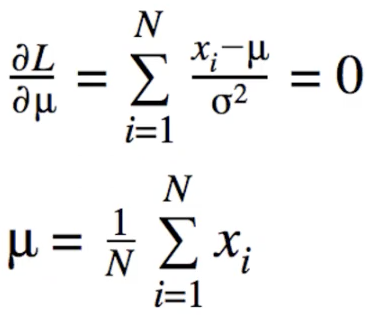

This is the familiar expression for the sample mean of a random variable! 

#### Note: I was slightly confused as to how the product was switched to a sum when using the log-likelihood-it is based on a log property, shown below.

In [6]:
import numpy as np 
a= 2 
b =6
c = 9
np.log(a*b*c)

4.6821312271242199

In [7]:
np.log(a)+np.log(b)+np.log(c)

4.6821312271242199

## So what? 
* people always say, you need to collect enough data for your measurements to be meaningful 
* but...how much data?
* Does this equation tell us how precise the measurement is? 
* No! 
* Bayesian methods will elegantly take this into account, but we will look at non-Bayesian methods first

--- 
# Maximum Likelihood Click Through Rate
* CTR = click through rate 
* This is a common measure in e-commerce, online advertising, and clickbait news sites
* Not a Gaussian distribution, more like a coin toss (2 possible outcomes- bernoulli distribution) 
* Buy/don't buy, click/don't click
* We will use CTR even though all the methods could be applied to conversion rate 
* They are all just the bernoulli distribution (cross-entropy cost function is log of Bernoulli likelihood)

### Note: MLE is essentially trying to find the parameters/distribution that maximize the likelihood of observing the data!

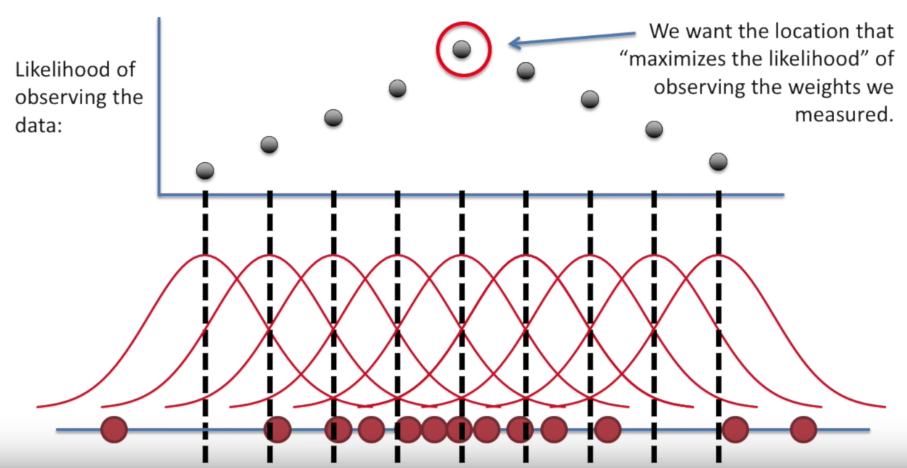

## Problem setup
* H = Click
* T = No click
* H + T = total number of impressions
* Also, these are independent and identically distributed (iid)
    * in other words, each coin toss is independent of the others, and each coin toss has the same probability of heads
* Let's call p(H) = p, so p(T) = 1 - p
* Bernoulli only has 1 parameter (p), while gaussian had 2 (mean and variance)
* Suppose we flip 2 H, 3  - what is the total likelihood???

Well remember, the Bernoulli Distribution looks like: 
### $$ P(n)=p^n(1-p)^{(1-n)}$$
So in our case that would be:
### $$ L(2H, 3T)=p^2(1-p)^{3} = p(H)p(H)p(T)p(T)p(T)$$
We were able to multiply the individual probabilities because they are independent coin tosses. We can generalize this as: 

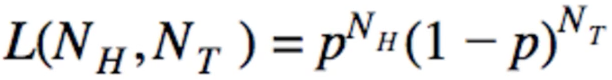

### What is the maximum likelihood estimate of p, from the data we have collected (total number of heads, and total number of tails)?

### Take log, take derivative, set it to 0, solve for p

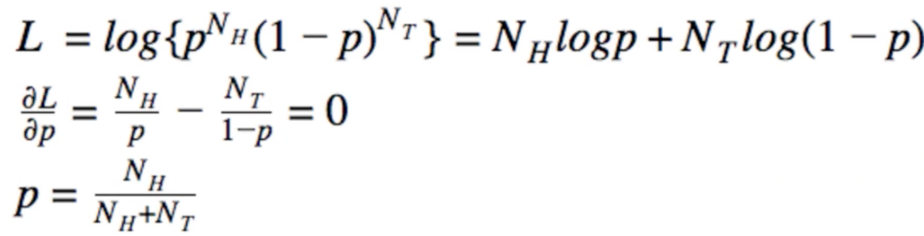

## Interesting result
Let $x_i=1$ be heads, and let $x_i=0$ be tails, then we can reformulate the estimation of p as:

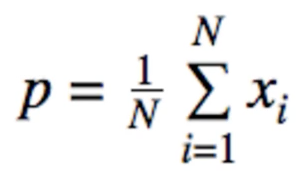

This is the exact same result as the Gaussian! (p is the mean of the Bernoulli distribution)
## Problem
* same problem as before - we don't know how precise this measurement is
* intuitively we know that 1/10 is not as accurate as 10/100, which is not as accurate as 100/1000
* But they all give the same p
* Next we'll look at the **frequentist way** of dealing with this, and later the **bayesian way**

# Confidence Intervals
* Now we are going to look a the frequentist/non-bayesian method of dealing with uncertainty of measurement of parameters - confidence intervals

## Sum of Random Variables
* we will use hat to denote an estimated parameter, and no hat to be the true parameter
* Note that the estimate mean, $\hat{\mu}$, is a sum of random variables 

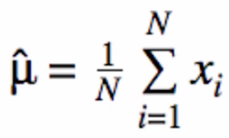

What is the significance of this? 
* X is random
* Y is random
* Z = X + Y 
* Is Z also random?
* Yes! And it also has probability distribution, a mean, variance, etc

So what are we getting at?
* Well, the trick here is that our estimate of the mean is also a random variable
* Recall the Central Limit Theorem! 
* It states that the sum of independent and identically distributed variables tends to a Gaussian Distribution 

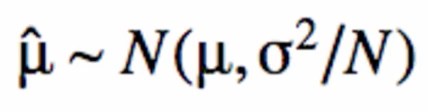

* in particular, it says that $\hat{\mu}$ is gaussian distributed with mean $\mu$ and variance $\sigma^2/N$ (where this variance is the standard error squared!), seen below: 

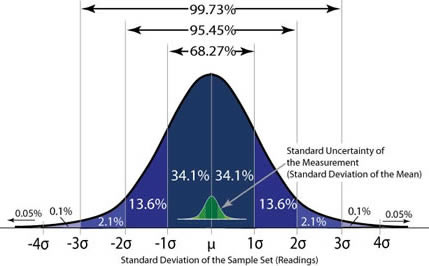

* remember, N is the number of samples collected

### quick aside on standard deviation:
The standard error (SE) of a parameter is the standard deviation of its sampling distribution or an estimate of the standard deviation. 

So what exactly is the difference between the standard deviation and standard error? Well, we need to define two other terms to clear this up: *statistic* and *parameter*.
* A **statistic** is used to describe a **sample**
* while a **parameter** is used to describe a **population**

With that known, the standard error uses statistics (sample data) while standard deviations use parameters (population data). The standard error tells you how far your sample statistic (like the sample mean) deviates from the actual population mean. The larger your sample size, the smaller the SE. In other words, the larger your sample size, the closer your sample mean is to the actual population mean.

## Scale Difference
* now this makes sense because as you collect more samples, the variance of your estimates should decrease
* At this point it is worth noting what $\mu$ and $\sigma$ are - they actually refer to the mean and variance of X

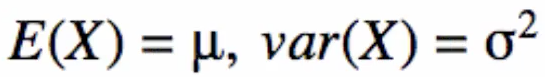

* So $\mu$ is the true mean of X, which is also the true mean of $\hat{\mu}$
* and $\sigma^2$ is the variance of X, while $\frac{\sigma^2}{N}$ is the variance of $\hat{\mu}$
* This means that if the variance of X is large, then you will need many more samples to get an accurate $\hat{\mu}$
* Note the difference in scale between the numerator and denominator in the variance - the numerator grows as a quadratic in $\sigma$, but the denominator grows linearly in $N$

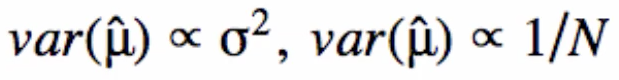

* Therefore, you need many more samples to decrease the variance of $\hat{\mu}$, but just a small increase in $\sigma$ can lead to a large increase in the variance of $\hat{\mu}$
* Another way of writing this is: 

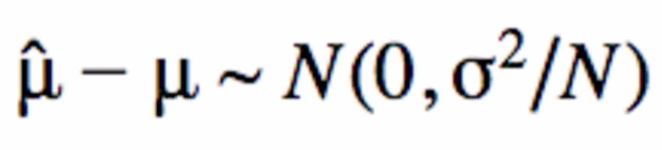

## Confidence Intervals
* We want to know the range of values that are likely to contain the true $\mu$ 
* So, we shade in 95% of the middle of the Gaussian, we can (almost) say "$\mu$ is probably here"
* Note: "95% CI" does **NOT** tell us "$\mu$ is in this interval with probability 95%"
* In reality, all we can say is: if we did many experiments to calculate the sample mean, 95% of the time, those confidence intervals would contain the true $\mu$

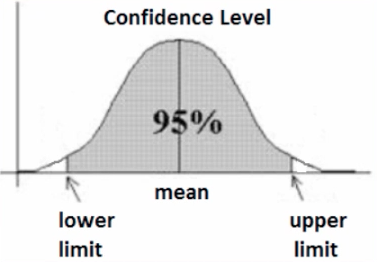

## Confidence Level / Significance Level 
* we have a symbol to represent this confidence level: $1-\alpha$
* we call the significance level $\alpha$

## Confidence Interval Limits
* We want the min/max value for the range where $\mu$ should lie 
* lets call them $x_{left}$ and $x_{right}$
* We want to find the limits such that the area under the Gaussian is 0.95
* again, calculus provides the tools - integral!

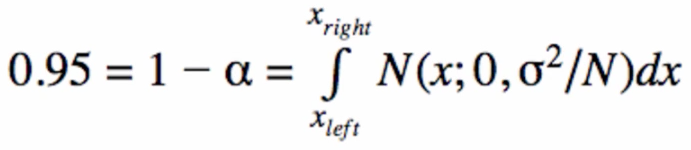

* can't be solved by hand, so we will not try
* Rather, manipulate it into a form such that we can find the answer computationally 
* since this is a gaussian with arbitrary variance, the first thing we can do is convert it to a standard normal, which looks like this: 



* mathematically that is done by taking X and subtracting the mean, and then dividing by the standard deviation, and setting that equal to a new variable Z (think of Z as a normalized X)
### $$Z = \frac{X - \mu_X}{\sigma_x}$$ 

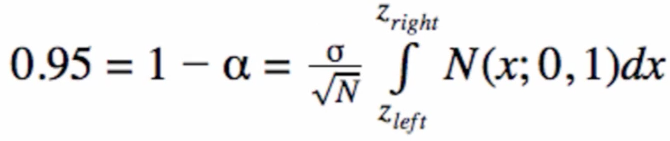

## Cumulative Distribution Function (CDF)
* can we make use of this? 

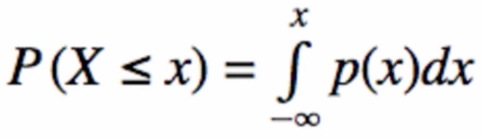

* a gaussian is symmetric, so if we want 5% on the tail ends, then we want each tail to be 2.5%
* in other words, $z_{right}$ should give us an area of (1-0.05/2) = 0.975

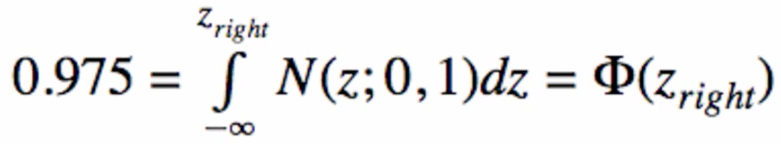

* typically we give this function the name phi

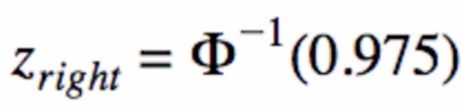

## Inverse CDF
So how do we actually compute this? 
* Scipy has a function to do this
* scipy.stats.norm.ppf
* ppf = percent point function, because statisticians like crazy names (in reality it is just the inverse of the cdf)
* since gaussian is symmetric:
### $$z_{left} = -z_{right}$$
Or: 

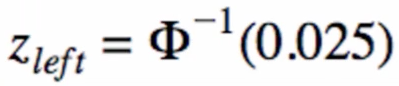

* since these are pretty standard calculations, many textbooks just use rounded-off numbers: 
### $$z_{left}= -1.96,\; z_{right} = 1.96$$

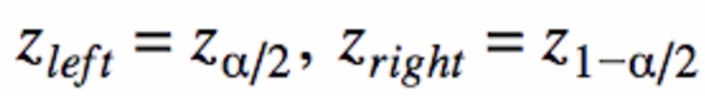

## Confidence Interval
We finally arrive at our confidence interval! 

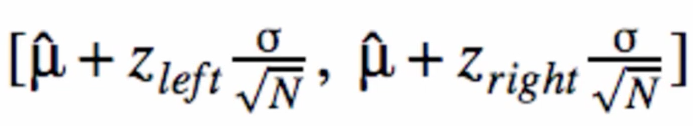

## There is a problem though...
One of these things we don't actually know! That is the standard deviation of X, $\sigma$. If we don't know the mean $\mu$ we probably don't know sigma $\sigma$ either. 

In that case we can use the estimated sigma, $\hat{\sigma}$ instead: 

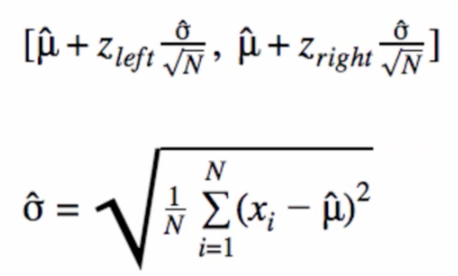

## Confidence Interval Approximation 
* To find the non-approximated version, we would use the inverse CDF of the t-distribution, but that is outside the scope of this course
* We are fine with Gaussian approximation because it will help with Bernoulli 
* In fact we will use the same interval:

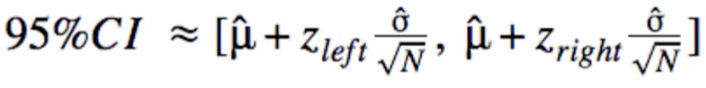

## Bernouli Confidence Interval
* We have just replace the gaussian symbols with the bernoulli symbols, it's the same formula!

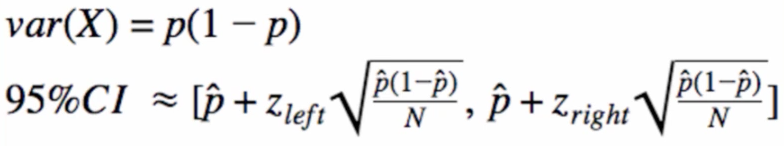

## Summary
* Apply Central limit theorem to show that maximum likelihood estimate of $\mu$ is Gaussian-distributed
* Find left/right limits that capture 95% of the probability for where $\mu$ could be 
* scale it to standard normal (mean 0, variance 1)
* rescale it back: X = mean + Z * stddev
* Remember: stddev of $\mu$-estimate scale proportionally to stddev(x), but inversely proportional to sqrt(N) 
* That means we need to collect many more samples to make the confidence interval smaller compared to the standard deviation of the data! 
* Later we will see that Bayesian methods of quantifying this uncertainty are more systematic and elegant